In [12]:
import numpy as np
import cv2

# Imports 

import numpy as np
from scipy.ndimage import convolve  
import matplotlib.pyplot as plt
import matplotlib as mpl 
import cv2 
import scipy
from PIL import Image

# Helper Functions 

def show_binary_image(image, title=None):

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV

    # Show the image
    plt.imshow(image, cmap=plt.cm.gray)
    

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)

    plt.show()
    



image1 = cv2.imread("images/cells/9343 AM.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 
image2 = cv2.imread("images/cells/10905 JL.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 
image3 = cv2.imread("images/cells/43590 AM.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 

ground_truth1 = cv2.imread("images/cells/9343 AM Edges.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 
ground_truth2 = cv2.imread("images/cells/10905 JL Edges.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 
ground_truth3 = cv2.imread("images/cells/43590 AM Edges.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 

def preprocess_ground_truth(image: np.ndarray):
    # Create a new array where True is set for elements that are 0 in the original image, and False otherwise
    mask = image == 0
    
    # Convert the boolean mask to integer (1 for True, 0 for False)
    preprocessed_image = mask.astype(int)
    
    return preprocessed_image


def gaussian_kernel(size: int = 9, sigma: float = 2.0) -> np.ndarray: 
    """
    Generates a Gaussian kernel matrix for applying a Gaussian blur filter. 
    The kernel generated is a square matrix of dimensions size x size, 
    centered around the matrix origin, with values computed from the 2D Gaussian function.

    Parameters:
    - size (int, optional): The size of one side of the square Gaussian kernel. Must be a positive odd integer
      to ensure the kernel has a center. Defaults to 9, resulting in a 9x9 kernel.
    - sigma (float, optional): The standard deviation of the Gaussian distribution used in the
      kernel's calculation. This controls the spread of the blur; a larger sigma results in a blurrier image.
      Defaults to 2.0. 

    Returns:
    - np.ndarray: A 2D Numpy array of shape (size, size) containing the Gaussian kernel. The values
      are of type `np.float64`, ensuring high precision for the calculations. The kernel is normalized so that
      its sum equals 1, making it suitable for convolution operations without altering the image brightness.
   """ 

    size = int(size) // 2  # Ensuring the kernel size is effectively odd
    x, y = np.mgrid[-size:size+1, -size:size+1]  # Create a grid of (x, y) coordinates
    normal = 1 / (2.0 * np.pi * sigma**2)  # Normalization constant for the Gaussian function
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal  # Compute the Gaussian function
    return g / np.sum(g)  # Normalize and return the kernel

ground_truth1 = preprocess_ground_truth(ground_truth1)
ground_truth2 = preprocess_ground_truth(ground_truth2)
ground_truth3 = preprocess_ground_truth(ground_truth3)



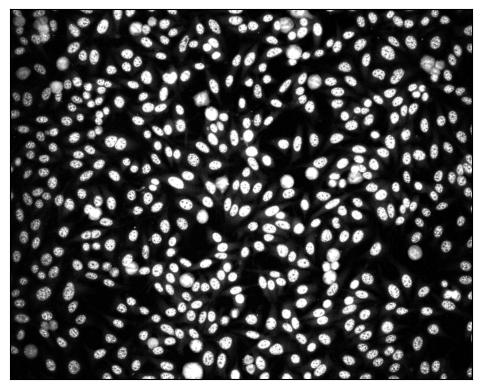

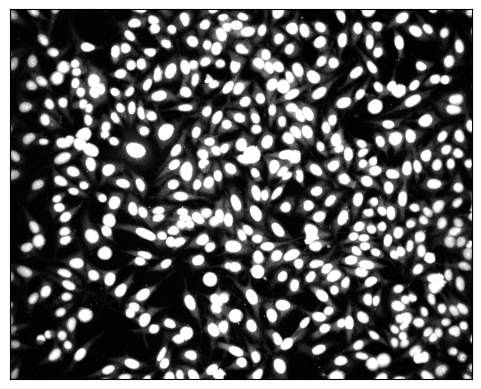

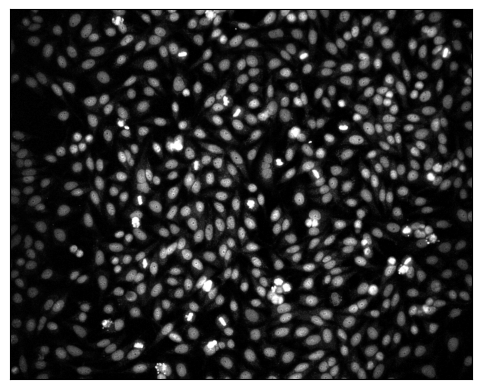

In [22]:
# import cv2
# import numpy as np

# # Function to apply high-pass filter directly to an image array
# def apply_high_pass_filter(image):
#     # Apply Gaussian blur to create a low-pass filter effect
#     blurred_image = cv2.GaussianBlur(image, (255, 255), 0)
    
#     # Subtract the blurred (low-pass filtered) image from the original to get high-pass filtered image
#     high_pass_filtered_image = cv2.subtract(image, blurred_image)
    
#     return high_pass_filtered_image

# # Assuming your images have been loaded as image1, image2, image3
# image1 = cv2.imread("images/cells/9343 AM.bmp", cv2.IMREAD_GRAYSCALE)
# image2 = cv2.imread("images/cells/10905 JL.bmp", cv2.IMREAD_GRAYSCALE)
# image3 = cv2.imread("images/cells/43590 AM.bmp", cv2.IMREAD_GRAYSCALE)
# show_binary_image(image1)
# show_binary_image(image2)
# show_binary_image(image3)

# # Apply the high-pass filter to each image
# image1 = apply_high_pass_filter(image1)
# image2 = apply_high_pass_filter(image2)
# image3 = apply_high_pass_filter(image3)


# show_binary_image(image1)
# show_binary_image(image2)
# show_binary_image(image3)


image1 = cv2.imread("images/cells/9343 AM.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 
image2 = cv2.imread("images/cells/10905 JL.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 
image3 = cv2.imread("images/cells/43590 AM.bmp", cv2.IMREAD_GRAYSCALE) # Retrieve the grayscale image. 


def unsharp_masking(image, kernel_size=(3,3), sigma=2, weight_original=5, weight_edges=2, gamma=2):
    gaussian_blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    edges = cv2.subtract(image, gaussian_blurred)
    enhanced_image = cv2.addWeighted(image, weight_original, edges, weight_edges, gamma)
    return enhanced_image


image1 = unsharp_masking(image1)
image2 = unsharp_masking(image2)
image3 = unsharp_masking(image3)
show_binary_image(image1)
show_binary_image(image2)
show_binary_image(image3)